In [209]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import os
import numpy as np

from matplotlib import colormaps


In [3]:
path = '/home/jane/.cache/kagglehub/datasets/cdminix/us-drought-meteorological-data/versions/5'
df_met = pd.read_csv('/'.join([path, 'test_timeseries/test_timeseries.csv']))

In [10]:
df_soil = pd.read_csv('../data/raw/us-drought-meteorological-data/soil_data.csv')
df_geo = df_soil.loc[:, ['fips', 'lat', 'lon']]
df_geo = df_geo.set_index(df_geo.fips).drop('fips', axis = 1)
for fips in df_geo.index:
    if len(df_met[df_met.fips == fips]) == 0:
        df_geo = df_geo.drop(fips)
        df_met = df_met[df_met.fips != fips]

In [67]:
df_met.date = pd.to_datetime(df_met.date, unit = 'D')

In [68]:
print(df_met.columns)
df_met.head()

Index(['fips', 'date', 'PRECTOT', 'PS', 'QV2M', 'T2M', 'T2MDEW', 'T2MWET',
       'T2M_MAX', 'T2M_MIN', 'T2M_RANGE', 'TS', 'WS10M', 'WS10M_MAX',
       'WS10M_MIN', 'WS10M_RANGE', 'WS50M', 'WS50M_MAX', 'WS50M_MIN',
       'WS50M_RANGE', 'score'],
      dtype='object')


,fips,date,PRECTOT,PS,QV2M,T2M,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,...,TS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,score
0,1001,2019-01-01,2.25,100.51,9.69,14.71,13.55,13.52,17.38,10.92,...,14.63,1.20,1.50,0.79,0.71,2.74,4.01,1.23,2.78,0.0
1,1001,2019-01-02,4.94,100.48,8.65,13.05,11.83,11.74,17.76,9.54,...,13.06,1.02,1.35,0.32,1.03,2.13,3.37,0.56,2.81,NaN
2,1001,2019-01-03,20.74,100.03,8.59,12.12,11.67,11.67,13.74,10.44,...,12.12,1.83,4.23,0.34,3.88,3.41,7.49,0.72,6.77,NaN
3,1001,2019-01-04,16.17,99.47,7.93,11.80,10.38,9.59,18.19,5.44,...,11.72,3.75,5.25,2.34,2.91,6.78,9.61,4.90,4.71,NaN
4,1001,2019-01-05,0.01,100.39,5.32,7.91,4.73,4.71,14.37,3.68,...,7.75,2.32,2.90,1.69,1.21,4.42,5.87,3.15,2.72,NaN


In [66]:
display(
    "Shape",
    df_met.shape,
    "Description",
    df_met.describe().round(2),
    "Duplicates",
    df_met.duplicated().sum(),
)


pd.DataFrame(
    {
        "Data Types": df_met.dtypes,
        "Missing Values": df_met.isnull().sum(),
        "Unique Values": df_met.nunique(),
        "Sample Values": [df_met[col].sample(3).tolist() for col in df_met.columns]
    })


'Shape'

(2271948, 21)

'Description'

,fips,date,PRECTOT,PS,QV2M,T2M,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,...,TS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,score
count,2271948.00,2271948,2271948.00,2271948.00,2271948.00,2271948.00,2271948.00,2271948.00,2271948.00,2271948.00,...,2271948.00,2271948.00,2271948.00,2271948.00,2271948.00,2271948.00,2271948.00,2271948.00,2271948.00,326340.00
mean,30670.38,2019-12-31 23:59:59.999999232,2.94,96.66,8.22,12.95,7.78,7.79,18.61,7.74,...,12.98,3.53,5.18,1.88,3.30,5.49,7.80,3.06,4.74,0.41
min,1001.00,2019-01-01 00:00:00,0.00,66.75,0.10,-38.57,-41.54,-38.59,-31.33,-45.46,...,-41.23,0.26,0.60,0.00,0.23,0.52,1.04,0.00,0.45,0.00
25%,19044.50,2019-07-02 00:00:00,0.00,95.86,3.96,4.53,-0.16,-0.11,10.18,-0.50,...,4.41,2.12,3.11,0.94,1.82,3.79,5.67,1.41,3.16,0.00
50%,29212.00,2020-01-01 00:00:00,0.21,98.30,7.06,13.89,8.25,8.09,20.14,8.08,...,13.88,3.14,4.68,1.62,2.82,5.10,7.31,2.72,4.30,0.00
75%,46007.50,2020-07-02 00:00:00,2.54,99.96,12.22,22.23,16.85,16.71,27.87,16.80,...,22.36,4.54,6.71,2.53,4.30,6.82,9.45,4.32,5.86,0.41
max,56043.00,2020-12-31 00:00:00,249.34,103.88,22.52,40.33,27.05,27.00,48.30,32.32,...,43.47,17.48,24.97,16.51,22.07,20.58,29.93,19.22,26.34,5.00
std,14979.11,NaN,6.72,5.44,4.93,10.86,10.33,10.10,11.40,10.63,...,11.06,1.83,2.62,1.31,1.97,2.29,2.87,2.07,2.20,0.84


'Duplicates'

0

,Data Types,Missing Values,Unique Values,Sample Values
fips,int64,0,3108,"[8023, 21001, 39095]"
date,datetime64[ns],0,731,"[2019-03-09 00:00:00, 2020-01-09 00:00:00, 201..."
PRECTOT,float64,0,7020,"[43.89, 0.41, 0.06]"
PS,float64,0,3636,"[99.69, 101.46, 100.66]"
QV2M,float64,0,2205,"[15.39, 11.79, 10.38]"
T2M,float64,0,6805,"[17.94, 17.42, 24.05]"
T2MDEW,float64,0,6028,"[7.59, 2.14, 13.91]"
T2MWET,float64,0,5766,"[20.6, 9.29, 8.89]"
T2M_MAX,float64,0,7122,"[30.06, 35.46, 9.62]"
T2M_MIN,float64,0,6796,"[1.45, -2.77, 4.07]"


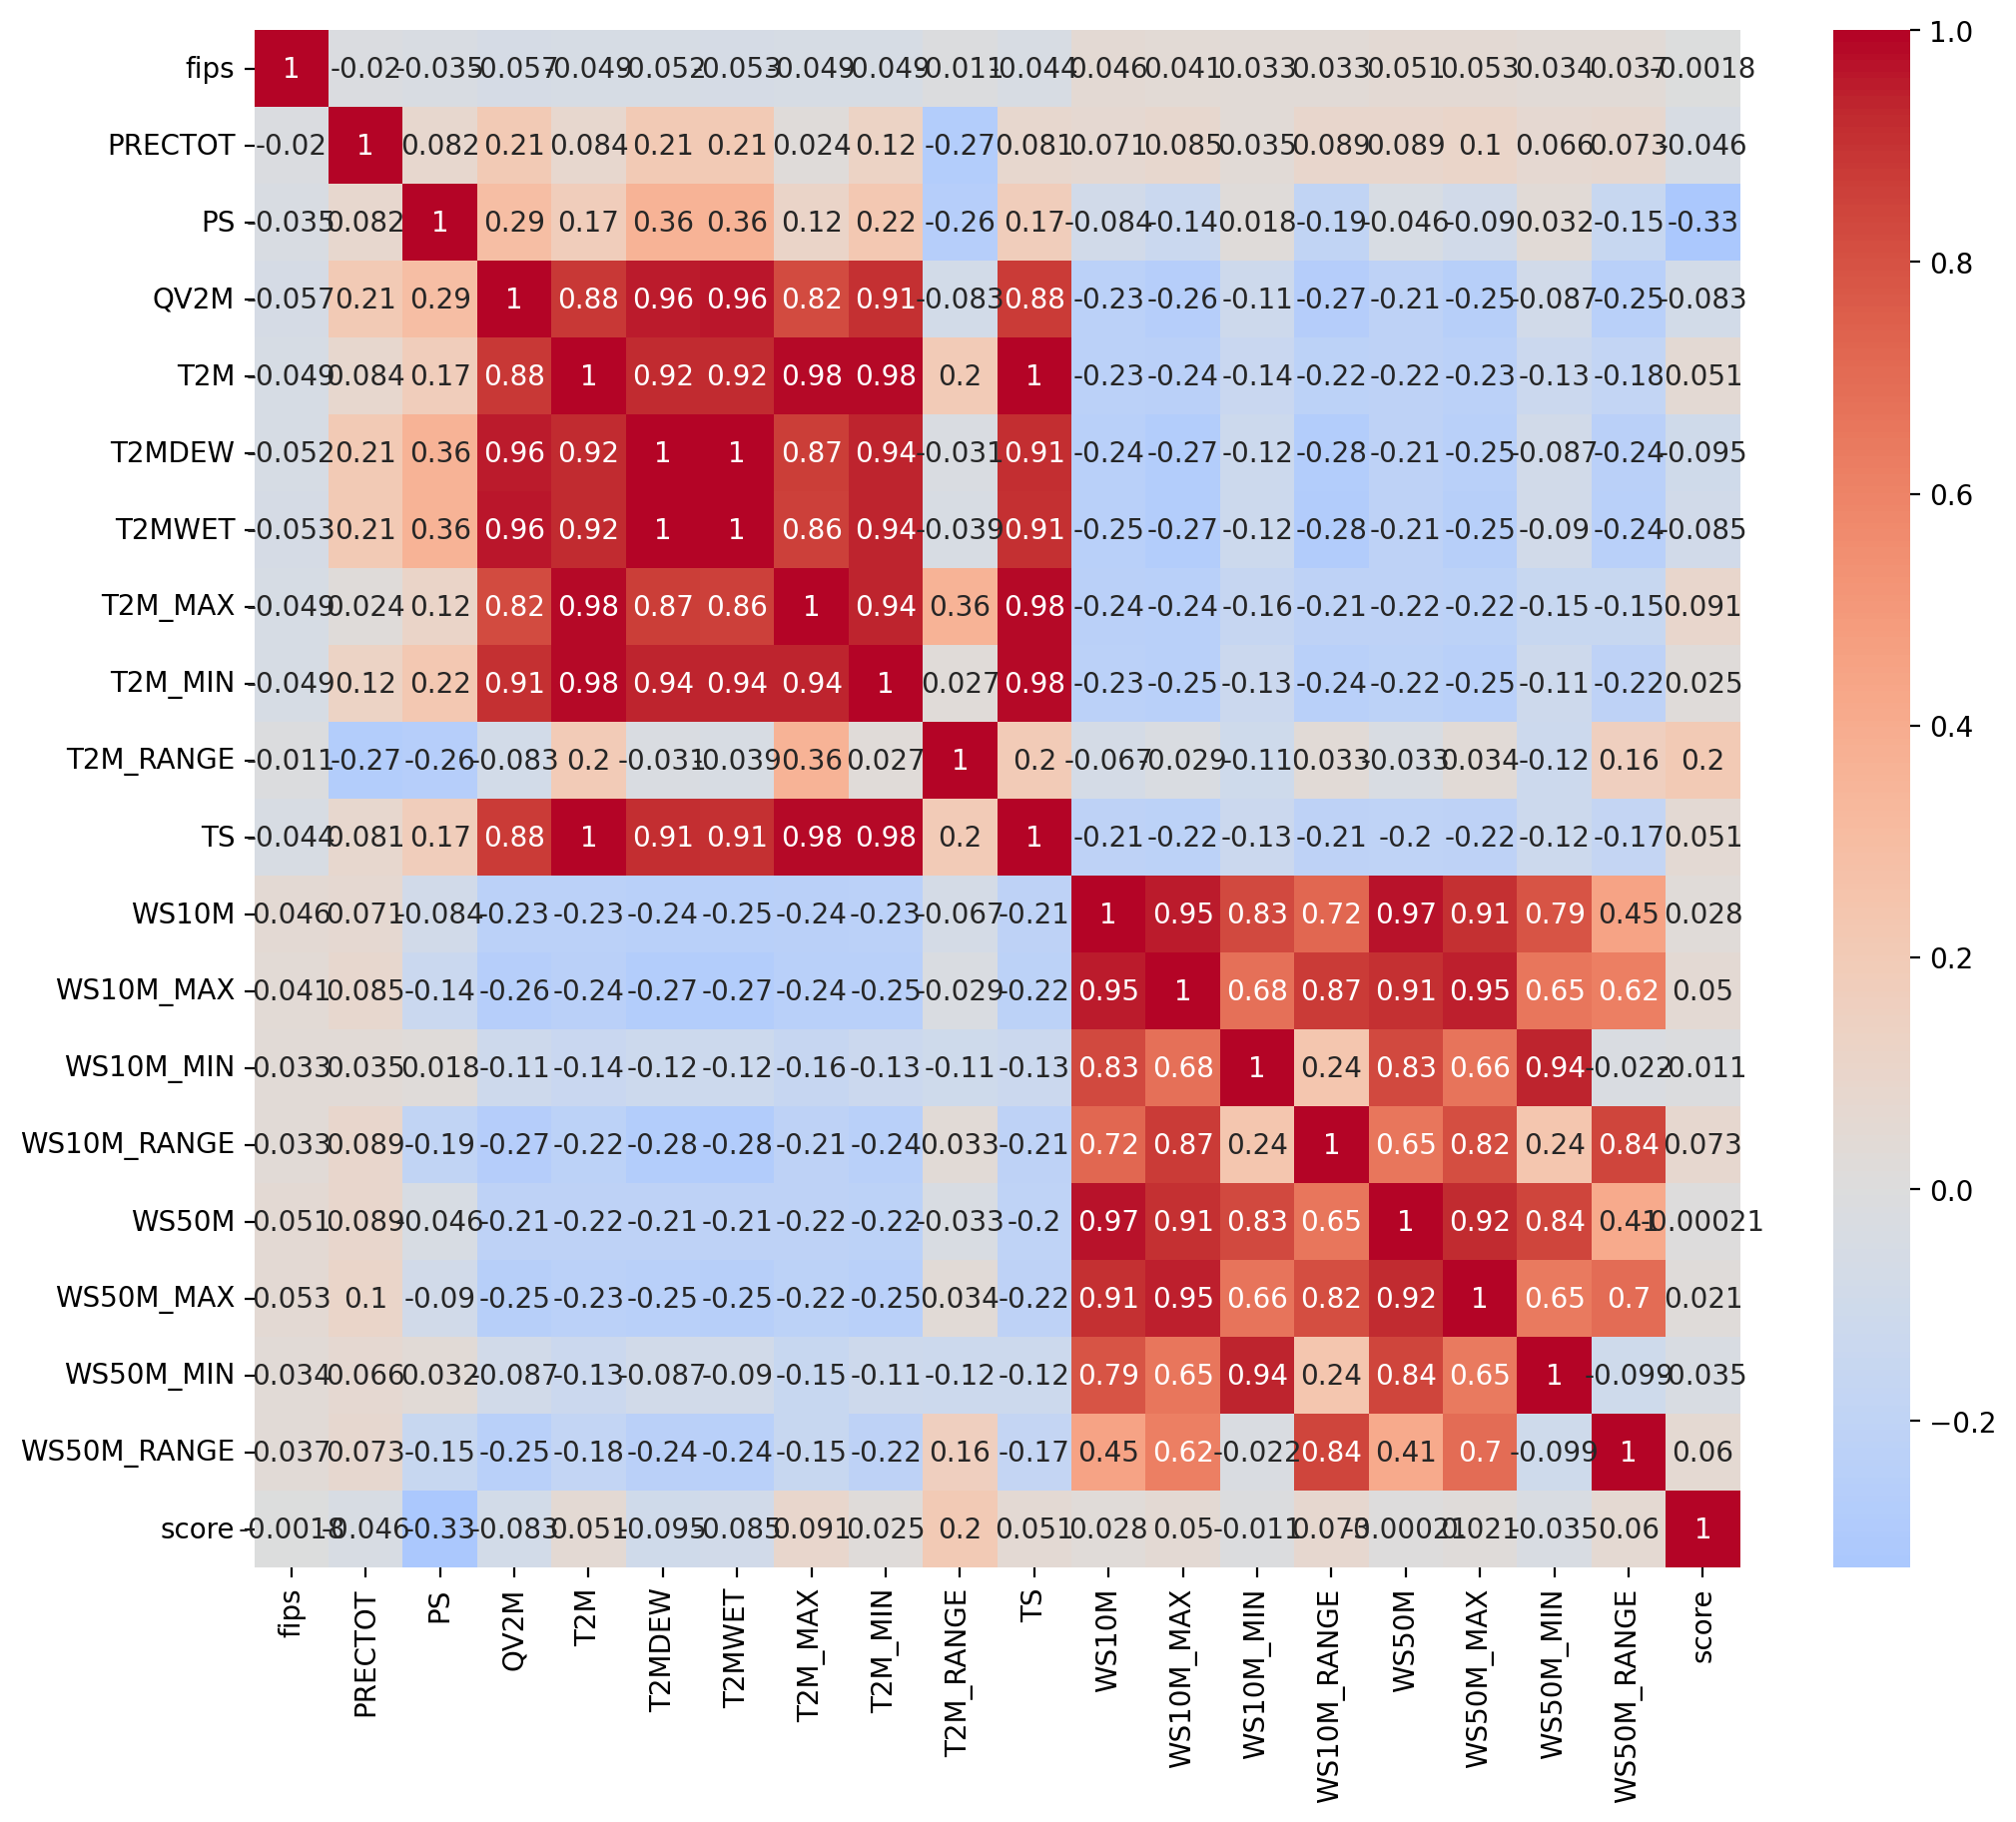

In [ ]:
fig, ax = plt.subplots(figsize=(12, 10), dpi=200)

sns.heatmap(df_met.corr(numeric_only=True), annot=True, cmap="coolwarm", center=0, ax=ax)

<Axes: >

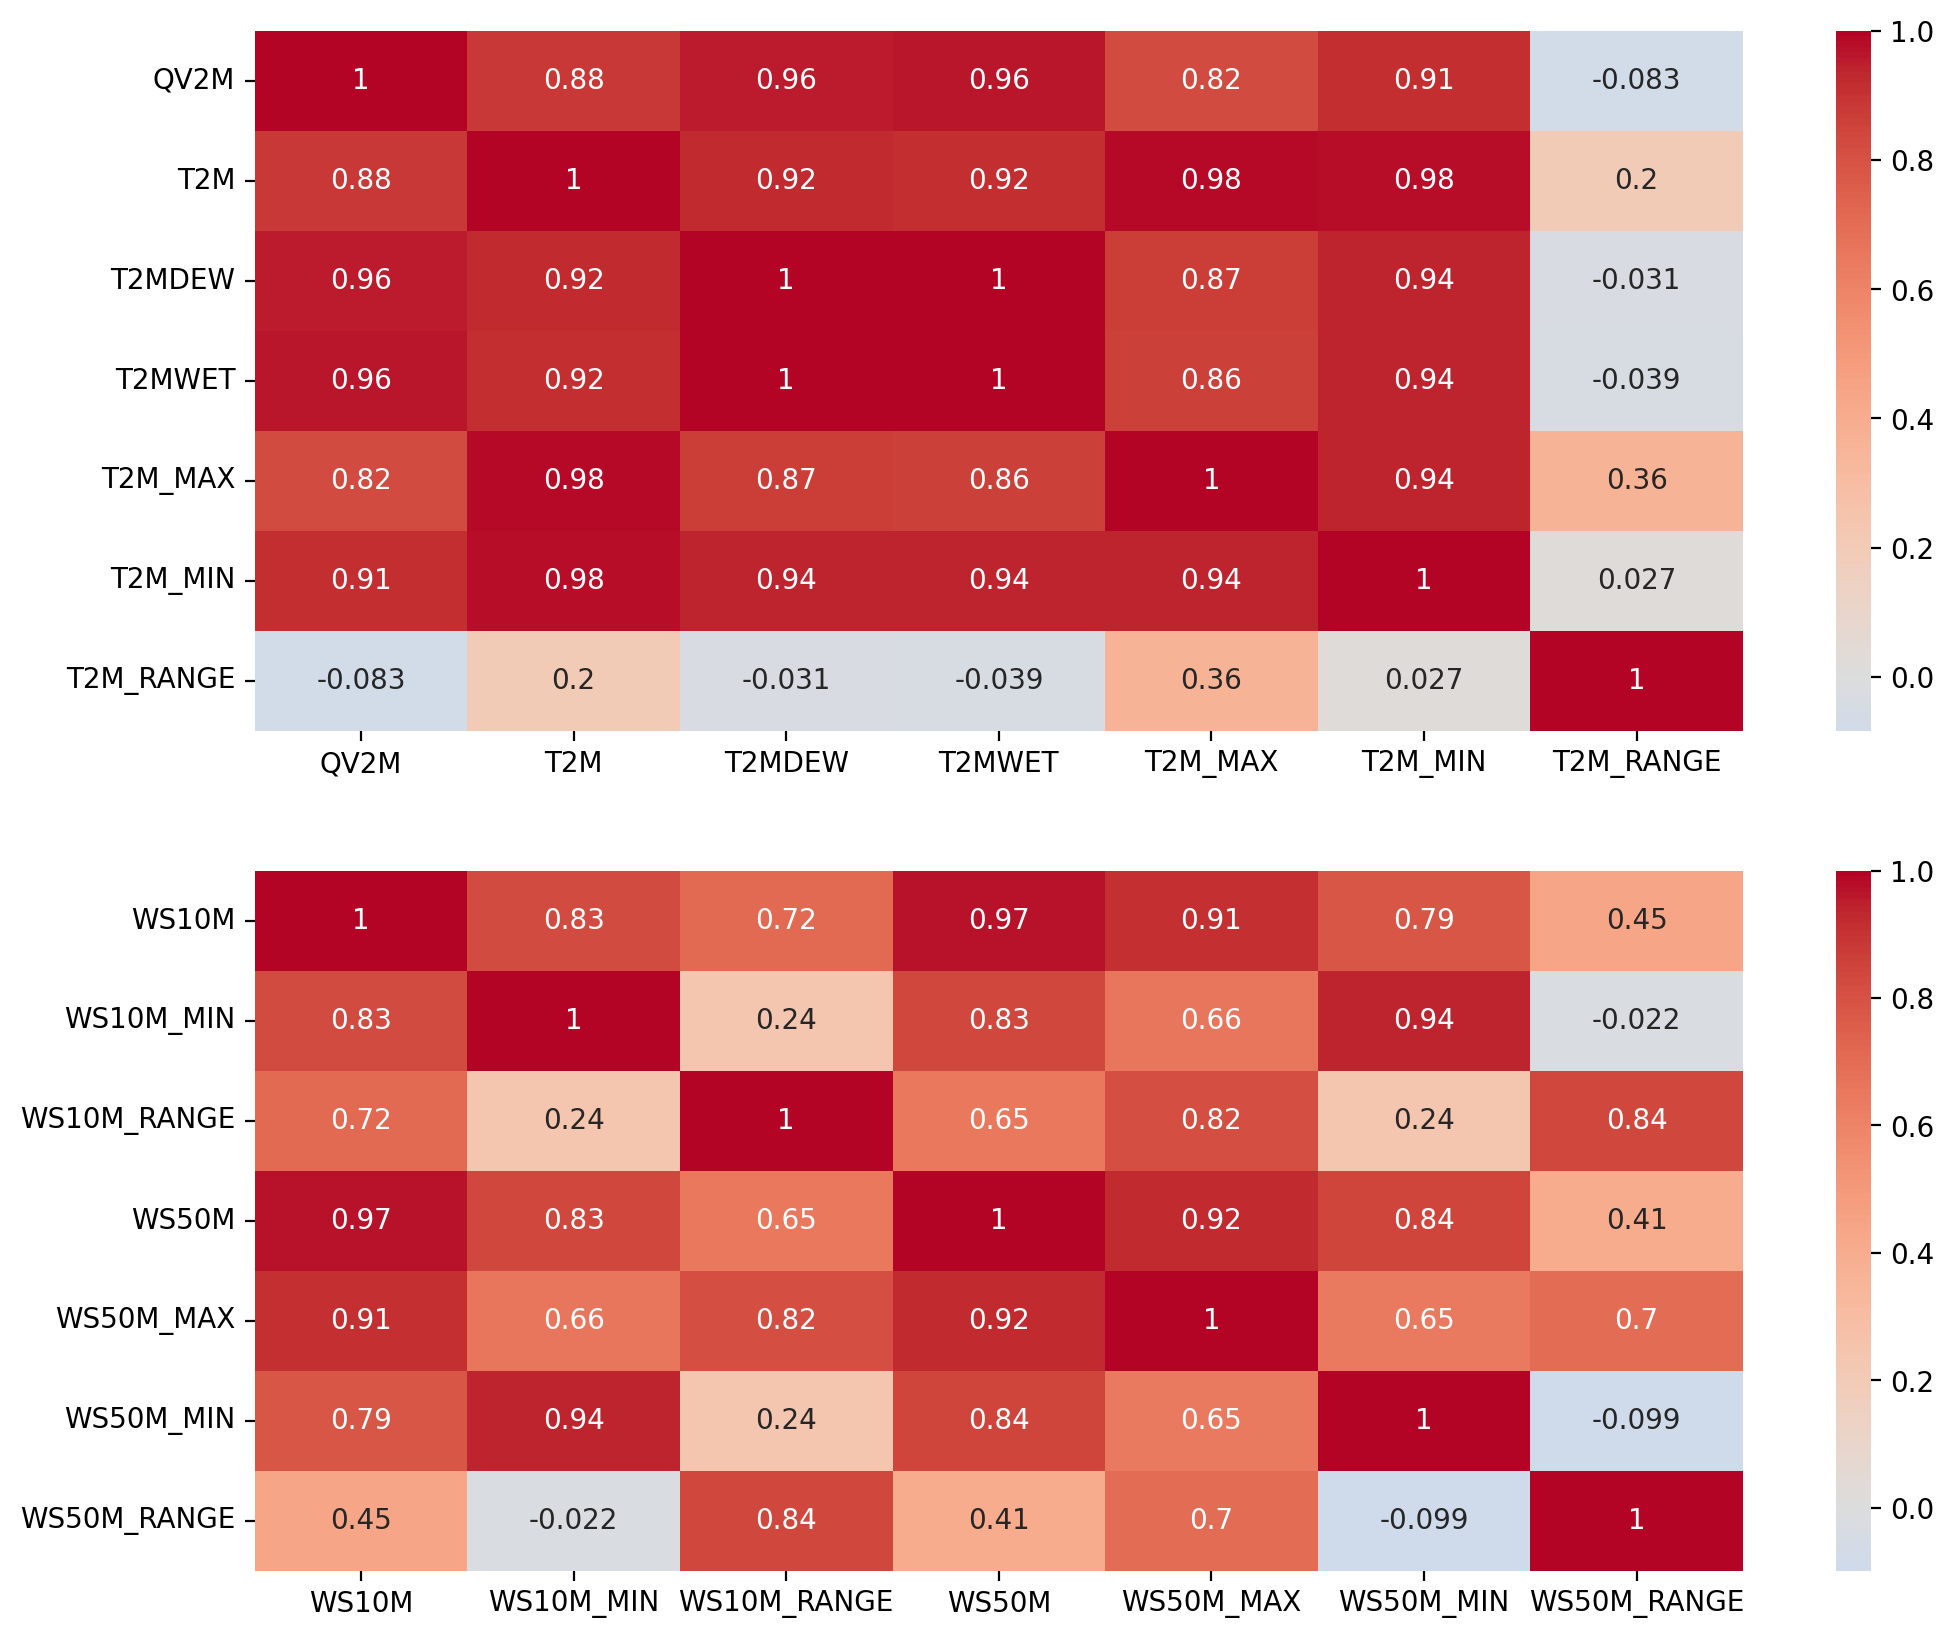

In [41]:
df_met_temp = df_met.loc[:, ['QV2M', 'T2M', 'T2MDEW', 'T2MWET', 'T2M_MAX', 'T2M_MIN', 'T2M_RANGE']]
df_met_wind = df_met.loc[:, ['WS10M', 'WS10M_MIN', 'WS10M_RANGE', 'WS50M', 'WS50M_MAX', 'WS50M_MIN', 'WS50M_RANGE']]
fig, ax = plt.subplots(nrows = 2, figsize=(12, 10), dpi=200)
sns.heatmap(df_met_temp.corr(numeric_only=True), annot=True, cmap="coolwarm", center=0, ax=ax[0])
sns.heatmap(df_met_wind.corr(numeric_only=True), annot=True, cmap="coolwarm", center=0, ax=ax[1])


In [72]:
met_daily_av_list = []
for date in df_met.date.unique():
    met_daily_av_list.append(df_met[df_met.date == date].mean())
df_met_daily_av = pd.DataFrame(met_daily_av_list)
df_met_daily_av.head()

,fips,date,PRECTOT,PS,QV2M,T2M,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,...,TS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,score
0,30670.37677,2019-01-01 00:00:00.000000000,0.890039,97.081686,4.610557,0.849289,-2.006448,-1.617178,5.311982,-3.214923,...,0.652246,3.550203,5.778021,1.558533,4.219559,5.398742,8.548137,2.543986,6.004302,0.2306
1,30670.37677,2019-01-02 00:00:00.000000256,3.596754,96.954180,4.230064,0.902619,-1.494791,-1.360708,4.889727,-2.640402,...,0.597371,2.994363,4.445241,1.520901,2.924173,4.585016,6.508941,2.303710,4.205467,NaN
2,30670.37677,2019-01-03 00:00:00.000000000,4.912976,96.503053,4.584086,2.755904,0.360669,0.379949,6.978832,-0.751760,...,2.245286,3.320299,4.618604,2.049826,2.568671,5.267786,7.272085,3.326055,3.945869,NaN
3,30670.37677,2019-01-04 00:00:00.000000000,5.687577,96.104707,4.839514,3.940119,1.694810,1.601071,9.126345,0.011107,...,3.182143,3.515312,4.988047,2.020183,2.967909,5.834772,8.115724,3.449009,4.666554,NaN
4,30670.37677,2019-01-05 00:00:00.000000000,1.305415,96.266731,4.705956,4.238658,1.934945,1.856924,9.973388,0.291631,...,3.571750,3.542889,4.908575,2.085634,2.822905,5.886931,8.274775,3.436924,4.837767,NaN


In [260]:
def fips_met_plotter(df, df_daily_av, df_geo, fips):
    df_local = df[df.fips == fips]
    days = pd.DataFrame(range(len(df_local)), index = df_local.index)
    
    fig, ax = plt.subplots(figsize = (10, 6))
    ax.set(title = 'Location of Fips {}'.format(fips), xlabel = 'longitude', ylabel = 'latitude')
    ax.scatter(df_soil.lon, df_soil.lat, s=3, c = 'g')
    ax.scatter(df_geo.loc[fips, :].lon, df_geo.loc[fips, :].lat, c = 'w', marker = "^", s = 80)
    plt.gca().set_facecolor('black')
    
    fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = [14, 12])
    
    obs = ['PRECTOT', 'T2M', 'QV2M', 'PS']
    obs_names = ['Precipitation', 'Temperature at 2m', 'Humidity at 2m', 'Surface Pressure']
    obs_units = ['mm', 'C', 'g/kg', 'kPa']
    cmap = colormaps['jet']
    colors = cmap(np.linspace(0, 1, 10))
    
    for plot in range(4):
        drought_mask_new = df_local.score >= 0.5
        ax[plot%2, plot//2].scatter(days[drought_mask_new], df_local[drought_mask_new][obs[plot]], 
                                    c = df_local[drought_mask_new]['score'], cmap = 'jet')
        ax[plot%2, plot//2].plot(days, df_local[obs[plot]], '.', label = 'Fips {}'.format(fips))
        ax[plot%2, plot//2].plot(days, df_daily_av[obs[plot]], '.', alpha = 0.25, label = 'Daily Mean')
        '''
        for i in range(5):
            drought_mask_lower = df_local.score > i + 0.5
            drought_mask_upper = df_local.score <= i + 1.5
            drought_mask = drought_mask_upper & drought_mask_lower
            ax[plot%2, plot//2].plot(days[drought_mask], df_local[drought_mask][obs[plot]], marker = 'd', linestyle = 'None',
                          c = colors[5 + i], ms = 8)
        '''
        
        
        ax[plot%2, plot//2].set(title = '{} in FIPS {} over 2 years'.format(obs_names[plot], fips),
                                xlabel = 'days since 1.1.2019', ylabel = '{} in {}'.format(obs_names[plot], obs_units[plot]))
        ax[plot%2, plot//2].set_facecolor('black')
        
        line_y_max = max(max(df_local[obs[plot]]), max(df_daily_av[obs[plot]]))
        line_y_min = min(min(df_local[obs[plot]]), min(df_daily_av[obs[plot]]))
        ax[plot%2, plot//2].vlines(0, ymin = line_y_min, ymax = line_y_max, colors = 'w', linestyles = '--', label = 'January 1st')
        ax[plot%2, plot//2].vlines(365, ymin = line_y_min, ymax = line_y_max, colors = 'w', linestyles = '--')
        ax[plot%2, plot//2].vlines(182, ymin = line_y_min, ymax = line_y_max, colors = 'r', linestyles = '--', label = 'July 1st')
        ax[plot%2, plot//2].vlines(365+182, ymin = line_y_min, ymax = line_y_max, colors = 'r', linestyles = '--')
        ax[plot%2, plot//2].legend()

    
    return

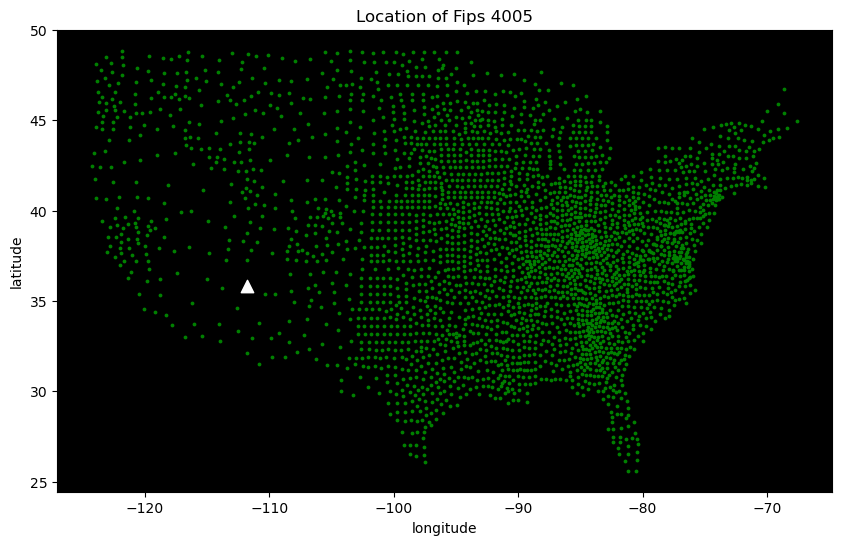

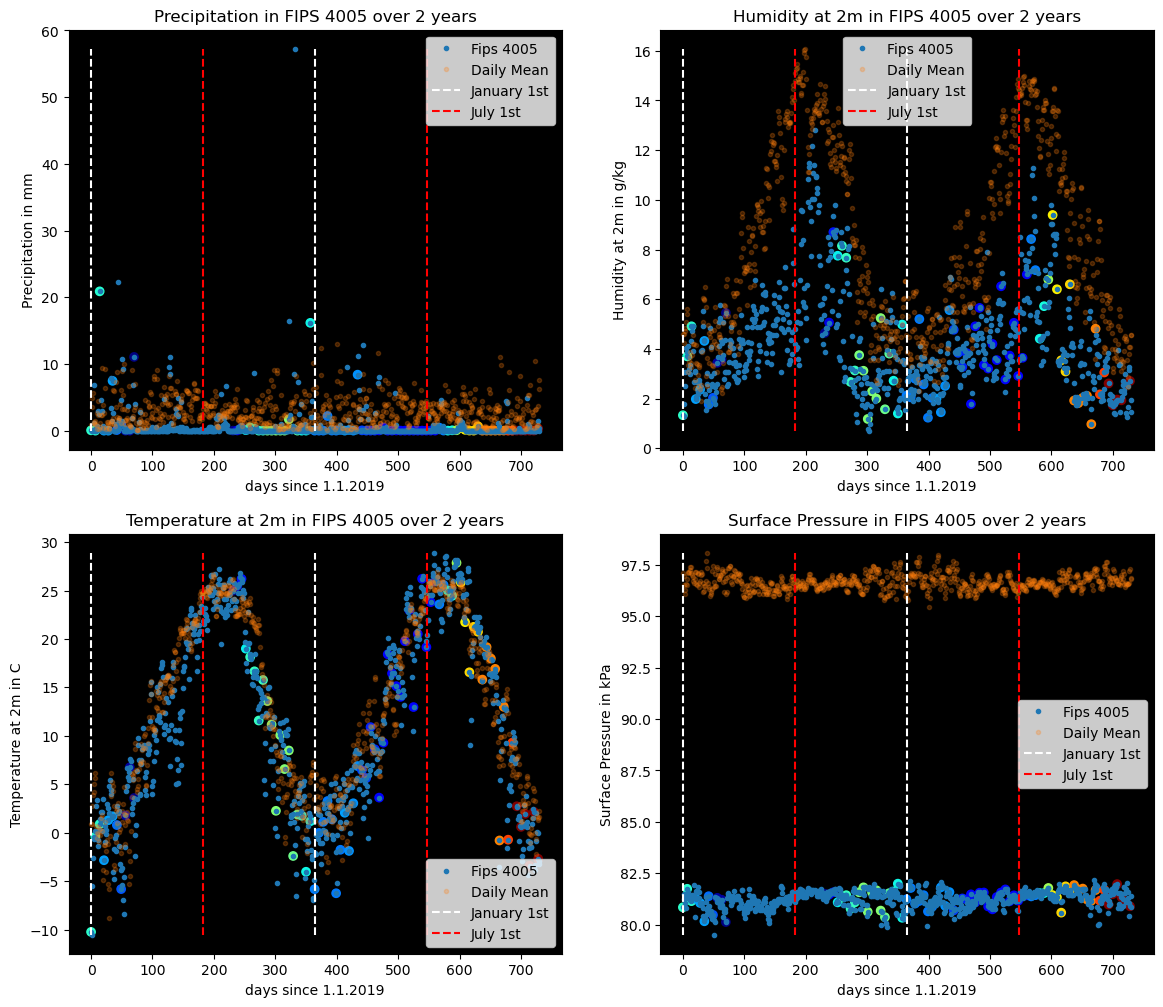

In [262]:
fips_met_plotter(df_met, df_met_daily_av, df_geo, 4005)

In [215]:
mean_local_drought_list = []
median_local_drought_list = []
max_local_drought_list = []
for fips in df_geo.index:
    df_local = df_met[df_met.fips == fips]
    mean_local_drought = df_local.score.dropna().mean()
    median_local_drought = df_local.score.dropna().median()
    max_local_drought = df_local.score.dropna().max()
    mean_local_drought_list.append(mean_local_drought)
    median_local_drought_list.append(median_local_drought)
    max_local_drought_list.append(max_local_drought)
df_local_drought = pd.DataFrame({'median' : median_local_drought_list, 
                                 'mean' : mean_local_drought_list,
                                 'max' : max_local_drought_list},
                                index = df_geo.index)

In [47]:
df_local_drought.head()

,median,mean,max
fips,,,
1001,0.0000,0.313297,2.8891
1005,0.0439,0.554210,3.0472
1003,0.2589,0.577939,2.6552
1007,0.0000,0.298976,2.0569
1009,0.0000,0.047847,1.0000


[Text(0.5, 1.0, 'Maximum Level Drought per County'),
 Text(0.5, 0, 'longitude'),
 Text(0, 0.5, 'latitude')]

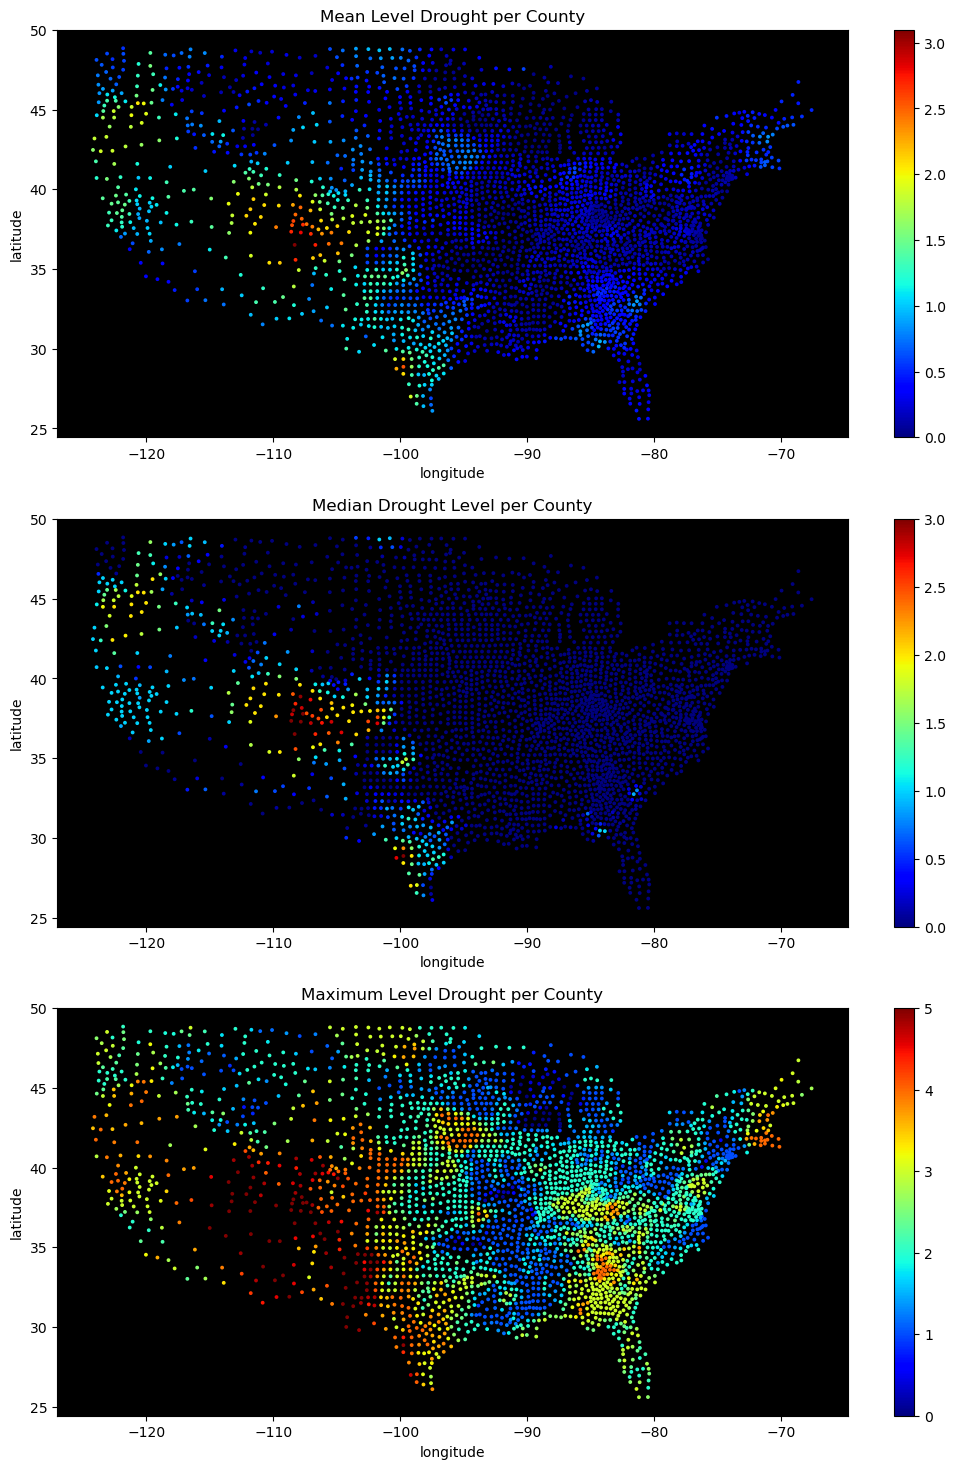

In [51]:
fig, ax = plt.subplots(nrows = 3, figsize=(12, 18))

cax0 = ax[0].scatter(df_geo.lon, df_geo.lat, c = df_local_drought['mean'], s = 3, cmap = 'jet', fc = 'black')
ax[0].set_facecolor('black')
plt.colorbar(cax0, fraction = 0.1)
ax[0].set(title = 'Mean Level Drought per County', xlabel = 'longitude', ylabel = 'latitude')

cax1 = ax[1].scatter(df_geo.lon, df_geo.lat, c = df_local_drought['median'], s = 3, cmap = 'jet', fc = 'black')
ax[1].set_facecolor('black')
plt.colorbar(cax1, fraction = 0.1)
ax[1].set(title = 'Median Drought Level per County', xlabel = 'longitude', ylabel = 'latitude')

cax2 = ax[2].scatter(df_geo.lon, df_geo.lat, c = df_local_drought['max'], s = 3, cmap = 'jet', fc = 'black')
ax[2].set_facecolor('black')
plt.colorbar(cax2, fraction = 0.1)
ax[2].set(title = 'Maximum Level Drought per County', xlabel = 'longitude', ylabel = 'latitude')

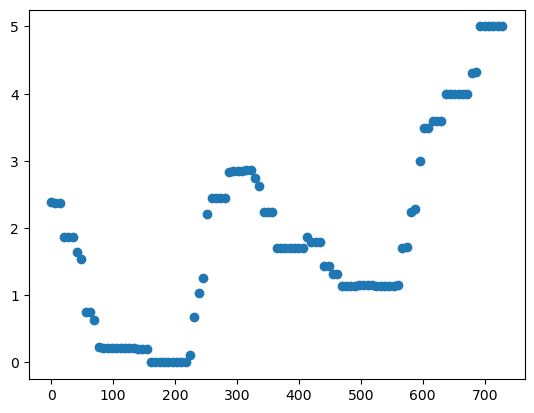

In [146]:
df_4005 = df_met[df_met.fips == 4005]
days = pd.DataFrame(range(len(df_4005)), index = df_local.index)
plt.plot(days, df_4005.score, 'o')
plt.show()

In [112]:
a = pd.DataFrame([0, 1, 2])
b = [False, True, False]

In [113]:
a[b]

,0
1,1


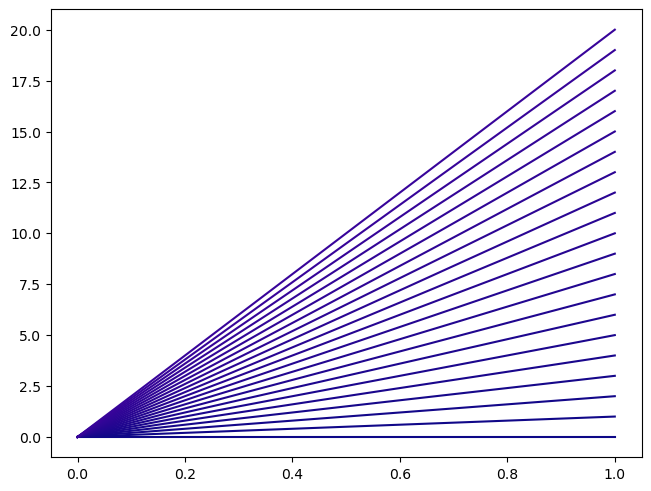

In [208]:
import matplotlib.pyplot as plt
import numpy as np

import matplotlib as mpl

n_lines = 21
cmap = mpl.colormaps['plasma']

# Take colors at regular intervals spanning the colormap.
colors = cmap(list(range(21))

fig, ax = plt.subplots(layout='constrained')

for i, color in enumerate(colors):
    ax.plot([0, i], color=color)

plt.show()